In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import methods
import pymaster as nmt
from importlib import reload

In [8]:
msk = np.zeros(hp.nside2npix(nside))
th, ph = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))
ph[np.where(ph > np.pi)[0]] -= 2 * np.pi
msk[np.where((th < 2.63) & (th > 1.86) &
             (ph > -np.pi / 4) & (ph < np.pi / 4))[0]] = 1.



array([0., 0., 0., ..., 0., 0., 0.])

In [2]:
reload(methods)

ell_input, TT, TE, EE, BB, PP = np.loadtxt('cl.txt', unpack=True)

nside = 128
lmax = 3*nside-1
npix = 12*nside**2
sigmab = hp.nside2resol(nside)
fwhm = (8*np.log(2))**0.5 * sigmab
pixels = methods.create_pixels()

input_cl = np.array([TT, EE, BB, TE])
input_cl /= ell_input*(ell_input+1)/2/np.pi 
for c in input_cl: c[0] = 0
input_cl = input_cl[:,:lmax+1]
ell_input = ell_input[:lmax+1]
input_map = hp.synfast(input_cl, nside, sigma=sigmab, new=True)

mask = np.zeros(npix)
mask[pixels[0]] = 1
mask_apo = nmt.mask_apodization(mask, 2.5, apotype="Smooth")    
# hp.mollview(mask_apo * input_map)

/tmp/ipykernel_14881/2775905546.py:13: RuntimeWarning: invalid value encountered in true_divide
  input_cl /= ell_input*(ell_input+1)/2/np.pi


In [3]:
reload(methods)
fl = methods.sim_fl(input_cl, pixels, n_sims=10, n_obs=10)

  0%|                                                    | 0/10 [00:00<?, ?it/s]/scratch/yuyang/destripe/methods.py:81: RuntimeWarning: invalid value encountered in true_divide
  output_map = PT(filtered_tod, pixels, npix)/PTP(pixels, npix)
100%|███████████████████████████████████████████| 10/10 [01:18<00:00,  7.90s/it]


In [4]:
reload(methods)
ells, cl_fb = methods.sim_cl2cl(input_cl, pixels, fl, n_sims=10, n_obs=10)

100%|███████████████████████████████████████████| 10/10 [01:27<00:00,  8.71s/it]


In [5]:
bin_width=np.median(np.diff(ells))/2

fb_mean = np.mean(cl_fb, axis=0)
fb_std = np.std(cl_fb, axis=0)

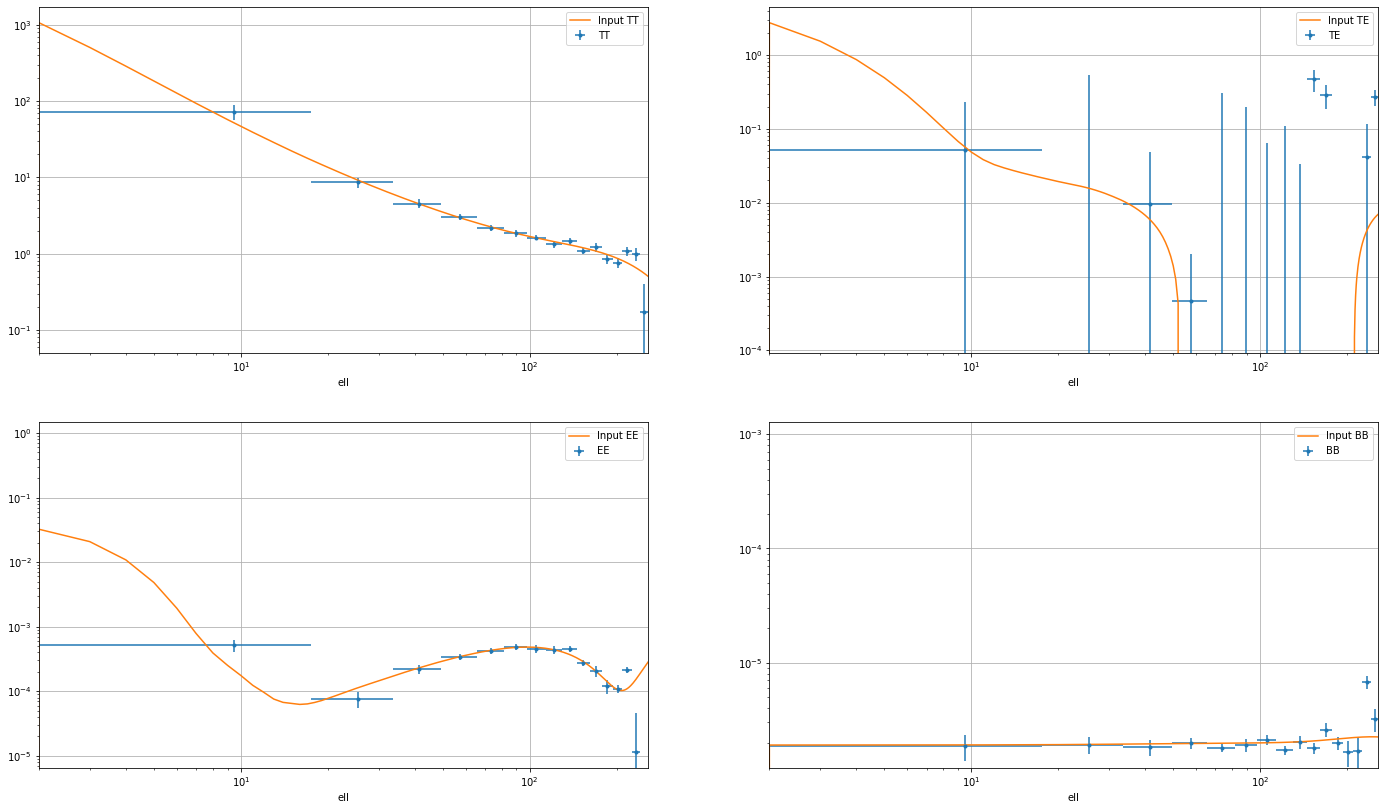

In [6]:
fig, axes = plt.subplots(2,2, figsize=(24, 14))

axes[0][0].errorbar(ells, fb_mean[0], yerr=fb_std[0], xerr=bin_width, fmt='.', label='TT')
axes[0][0].plot(ell_input, input_cl[0], label='Input TT')

axes[0][1].errorbar(ells, fb_mean[3], yerr=fb_std[3], xerr=bin_width, fmt='.', label='TE')
axes[0][1].plot(ell_input, input_cl[3], label='Input TE')

axes[1][0].errorbar(ells, fb_mean[1], yerr=fb_std[1], xerr=bin_width, fmt='.', label='EE')
axes[1][0].plot(ell_input, input_cl[1], label='Input EE')

axes[1][1].errorbar(ells, fb_mean[2], yerr=fb_std[2], xerr=bin_width, fmt='.', label='BB')
axes[1][1].plot(ell_input, input_cl[2], label='Input BB')

for ax in axes.flatten():
    ax.loglog()
    ax.set_xlabel('ell')
    ax.legend()
    ax.grid()  
    ax.set_xlim([2e0,2*nside])


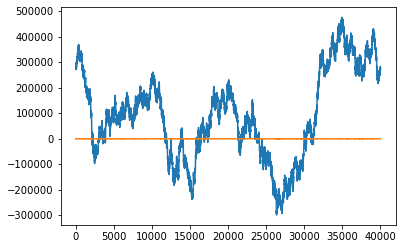

In [7]:
plt.plot(methods.generate_noise(len(pixels[0]),10,0.5,2,100))
plt.plot(input_map[0][pixels[0]])

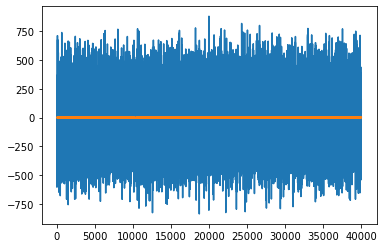

In [23]:
plt.plot(methods.generate_noise(len(pixels[0]),10,0.1,0.1,150))
plt.plot(input_map[1][pixels[0]])

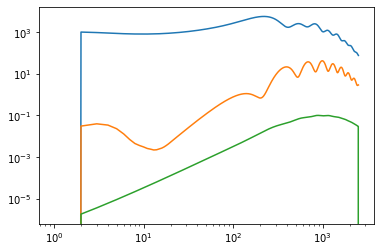

In [4]:
plt.loglog(ell_input, TT)
plt.loglog(ell_input, EE)
plt.loglog(ell_input, BB)

In [5]:
a = hp.anafast(input_map)

In [75]:
a[:4].shape

(4, 384)

[]

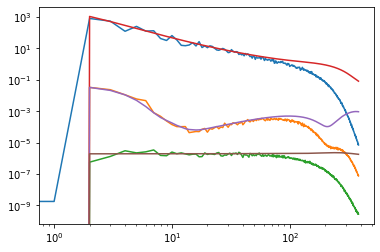

In [72]:
plt.plot(a[0])
plt.plot(a[1])
plt.plot(a[2])

plt.plot(input_cl[0])
plt.plot(input_cl[1])
plt.plot(input_cl[2])
plt.loglog()


In [4]:
# reload(methods)
# fl = methods.sim_fl(TT, pixels, n_sims=10, n_obs=10)

# plt.plot(fl)
# plt.xlim([0, 2*nside])
# plt.ylim([0,1])

# ells, cl_fb = methods.sim_cl2cl(TT, pixels, fl, n_sims=10, n_obs=10)
# ells, cl_fr = methods.sim_cl2cl(TT, pixels, n_sims=10, n_obs=10, replace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


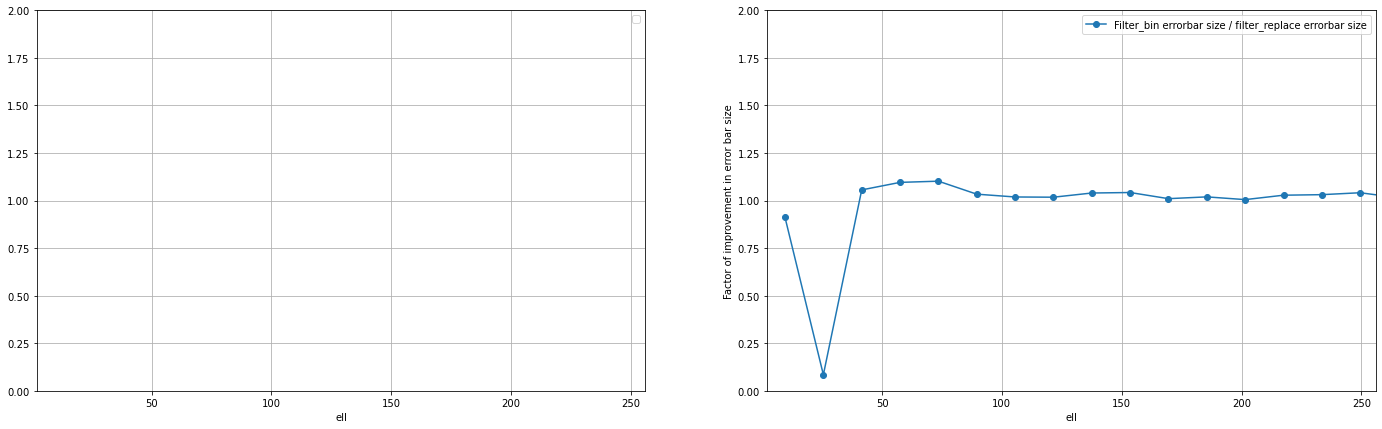

In [7]:
fig, axes = plt.subplots(1,2, figsize=(24, 7))
# axes[0].plot(ells, (fb_std/fb_mean) / (fb_std/fb_mean), marker='o', label='Filter bin')
# axes[0].set_ylabel('Factor of inflation of error size by transfer func')

axes[1].plot(ells, (fb_std/fb_mean)/(fr_std/fr_mean), marker='o', label='Filter_bin errorbar size / filter_replace errorbar size')
axes[1].set_ylabel('Factor of improvement in error bar size')

for ax in axes:
    ax.grid()
    ax.legend()
    ax.set_xlabel('ell')
    ax.set_ylim([0,2])
    ax.set_xlim([2, 2*nside])

In [11]:
np.mean(((fb_std/fb_mean)/(fr_std/fr_mean))[2:15]) 

1.0382689396660574